# FantaBayesianNet

In [2]:
import sys
!{sys.executable} -m pip install pgmpy
!{sys.executable} -m pip install --upgrade pip

     |████████████████████████████████| 337kB 27.0MB/s 
     |████████████████████████████████| 1.5MB 23.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


## 1. Define the model
The first step consists in building the structure of our model, that is to define the relations between the involved variables.
In the following lines we define the network model using pgmpy library and I display the resulting graph using networkx.

In [3]:
from pgmpy.models import BayesianModel

# Grade = ([<=5.5], [6-7], [7.5-9], [>=9.5])


model = BayesianModel([('red_card', 'grade_range'),
                       ('yellow_card', 'grade_range'),
                       ('goal', 'grade_range'),
                       ('assist', 'grade_range'),
                       ('available', 'starter'),
                       ('starter', 'time_range'),
                       #('TimeRange', 'Grade'),  # check after if with this edge better resuts come
                       ('difficulty_match', 'deployability'),
                       ('grade_range', 'deployability'),
                       ('time_range', 'deployability')
                       ])

model_2 = BayesianModel([('red_card', 'grade_range'),
                       ('yellow_card', 'grade_range'),
                       ('goal', 'grade_range'),
                       ('assist', 'grade_range'),
                       ('available', 'starter'),
                       ('starter', 'time_range'),
                       ('time_range', 'grade_range'), 
                       ('difficulty_match', 'deployability'),
                       ('grade_range', 'deployability'),
                       ('time_range', 'deployability')
                       ])

#Network nodes and out-edges
nodes = list(model.nodes())
edges = list(model.edges())
print("Nodes:", nodes)
print("\nOutEdges:", edges)

Nodes: ['red_card', 'grade_range', 'yellow_card', 'goal', 'assist', 'available', 'starter', 'time_range', 'difficulty_match', 'deployability']

OutEdges: [('red_card', 'grade_range'), ('grade_range', 'deployability'), ('yellow_card', 'grade_range'), ('goal', 'grade_range'), ('assist', 'grade_range'), ('available', 'starter'), ('starter', 'time_range'), ('time_range', 'deployability'), ('difficulty_match', 'deployability')]


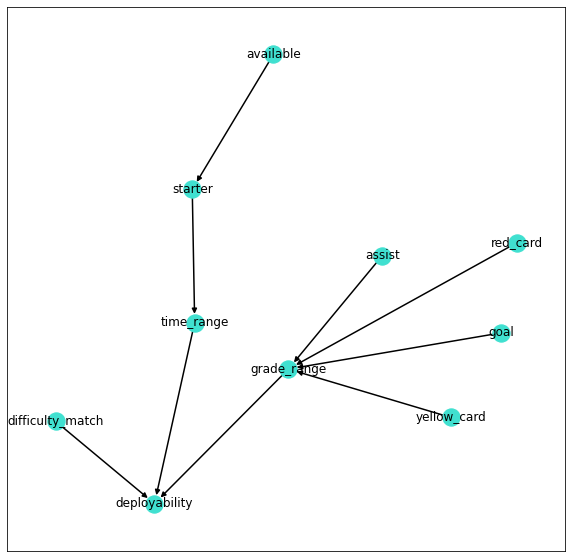

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
%matplotlib inline
np.random.seed(8)

DAG = nx.DiGraph()
DAG.add_edges_from(edges)

fig = plt.figure(figsize = (10,10))
pos = nx.spring_layout(DAG) #Position nodes computed by using Fruchterman-Reingold force-directed algorithm.
nx.draw_networkx_nodes(DAG, pos=pos, node_color='turquoise')
nx.draw_networkx_labels(DAG, pos=pos)
nx.draw_networkx_edges(DAG, pos=pos, edge_color='black', width = 1.5, arrows=True)
plt.show()

In [13]:
from google.colab import files
upload = files.upload()

Saving stats_lozano.csv to stats_lozano.csv
Saving stats_morata.csv to stats_morata.csv
Saving stats_muriel.csv to stats_muriel.csv
Saving stats_simy.csv to stats_simy.csv


# 2. Fitting the data

In [12]:
import pandas as pd
from pgmpy.estimators import BayesianEstimator

# Loading player dataframe (Immobile)
model_immobile = model.copy()
df_immobile = pd.read_csv("stats_immobile.csv")
# Fitting model
model_immobile.fit(df_immobile, estimator=BayesianEstimator,prior_type="BDeu",equivalent_sample_size=10,complete_samples_only=False)
print("Immobile")
print(model_immobile.get_cpds("grade_range"))

# Loading Ibrahimovic data
model_ibrahimovic = model.copy()
df_ibrahimovic = pd.read_csv("stats_ibrahimovic.csv")
# Fitting model
model_ibrahimovic.fit(df_ibrahimovic, estimator=BayesianEstimator,prior_type='BDeu', equivalent_sample_size=1000)
#print("Ibrahimovic")
#print(model_ibrahimovic.get_cpds("deployability"))

# Second version of the model, it provides better results wrt the real domain but smoothing...
model_immobile_2 = model_2.copy()
# Fitting model
model_immobile_2.fit(df_immobile, estimator=BayesianEstimator,prior_type="BDeu",equivalent_sample_size=10,complete_samples_only=False)
print("Immobile second model")
print(model_immobile_2.get_cpds("grade_range"))

Immobile
+--------------------+----------------------+-------------------+---------------------+-------------------+----------------------+---------------------+--------------------+-------------------+----------------------+-------------------+--------------------+-------------------+---------------------+---------------------+--------------------+-------------------+
| assist             | assist(False)        | assist(False)     | assist(False)       | assist(False)     | assist(False)        | assist(False)       | assist(False)      | assist(False)     | assist(True)         | assist(True)      | assist(True)       | assist(True)      | assist(True)        | assist(True)        | assist(True)       | assist(True)      |
+--------------------+----------------------+-------------------+---------------------+-------------------+----------------------+---------------------+--------------------+-------------------+----------------------+-------------------+--------------------+--------

In [15]:
df_ibrahimovic = pd.read_csv("stats_ibrahimovic.csv")
df_immobile = pd.read_csv("stats_immobile.csv")
df_muriel = pd.read_csv("stats_muriel.csv")
df_simy = pd.read_csv("stats_simy.csv")
df_lozano = pd.read_csv("stats_lozano.csv")
df_morata = pd.read_csv("stats_morata.csv")

df = pd.concat([df_ibrahimovic, df_immobile, df_muriel, df_morata, df_lozano, df_simy])
df

,matchday,grade_range,goal,assist,yellow_card,red_card,available,starter,time_range,difficulty_match,deployability
0,1,>=9.5,True,False,False,False,True,True,46-90,1,True
1,2,sv,False,False,False,False,False,False,0-15,1,False
2,3,sv,False,False,False,False,False,False,0-15,1,False
3,4,>=9.5,True,False,True,False,True,True,46-90,3,True
4,5,>=9.5,True,False,True,False,True,True,46-90,2,True
...,...,...,...,...,...,...,...,...,...,...,...
23,24,<=5.5,False,False,False,False,True,False,16-45,2,False
24,25,7.5-9,True,False,False,False,True,True,46-90,4,True
25,26,>=9.5,True,False,False,False,True,True,46-90,2,True
26,27,>=9.5,True,False,False,False,True,True,46-90,4,True


In [16]:
# Loading player dataframe (Immobile)
# Fitting model
model.fit(df, estimator=BayesianEstimator,prior_type="BDeu",equivalent_sample_size=10,complete_samples_only=False)
print(model.get_cpds("grade_range"))

# Fitting model
model_2.fit(df, estimator=BayesianEstimator,prior_type="BDeu",equivalent_sample_size=10,complete_samples_only=False)
print(model_2.get_cpds("grade_range"))


+--------------------+-----------------------+----------------------+---------------------+-------------------+----------------------+----------------------+---------------------+-------------------+----------------------+-------------------+--------------------+-------------------+----------------------+---------------------+--------------------+-------------------+
| assist             | assist(False)         | assist(False)        | assist(False)       | assist(False)     | assist(False)        | assist(False)        | assist(False)       | assist(False)     | assist(True)         | assist(True)      | assist(True)       | assist(True)      | assist(True)         | assist(True)        | assist(True)       | assist(True)      |
+--------------------+-----------------------+----------------------+---------------------+-------------------+----------------------+----------------------+---------------------+-------------------+----------------------+-------------------+------------------